### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### ================================
### Step 1: Generate Synthetic Data
### ================================

In [2]:
np.random.seed(42)
N = 500  # Total data points
d = 12   # Number of features
train_ratio = 0.7
val_ratio = 0.15

# Generate feature matrix and true weights
X = np.random.normal(0, 1, (N, d))
true_weights = np.linspace(1, 5, d)  # Linearly spaced true weights
epsilon = np.random.normal(0, 0.5, N)  # Noise
y = X @ true_weights + epsilon  # Generate target values

# Split data into train, validation, and test sets
train_size = int(N * train_ratio)
val_size = int(N * val_ratio)
test_size = N - train_size - val_size

X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

### ================================
### Step 2: Ridge Regression Functions
### ================================

In [3]:
def ridge_loss(w, X, y, lam):
    """
    Calculate the ridge regression loss.
    w: Weights
    X: Features
    y: Target values
    lam: Regularization parameter
    
    Returns: Ridge regression loss
    
    The equation for the ridge regression loss is: L(w) = ||y - Xw||^2 + λ||w||^2
    
    """
    residuals = y - X @ w
    return np.sum(residuals**2) + lam * np.sum(w**2)

def ridge_gradient(w, X, y, lam):
    """Calculate the gradient of the ridge regression loss."""
    residuals = y - X @ w
    grad = -2 * X.T @ residuals + 2 * lam * w
    return grad

def gradient_descent(loss_fn, grad_fn, w_init, X, y, lam, lr=0.01, tol=1e-6, max_iters=1000):
    """Perform gradient descent to minimize the ridge regression loss."""
    w = w_init
    for i in range(max_iters):
        grad = grad_fn(w, X, y, lam)
        w_new = w - lr * grad
        if np.linalg.norm(w_new - w, ord=2) < tol:
            break
        w = w_new
    return w

### ================================
### Step 3: Variance and Bias Calculation
### ================================

In [4]:
def calculate_bias_variance(X_train, y_train, X_val, y_val, lambdas, num_datasets=20,
                            sub_sample_size=50):
    """
    Calculate the bias and variance for ridge regression models trained on multiple datasets.
    """
    biases, variances = [], []
    for lam in lambdas:
        predictions = []
        for _ in range(num_datasets):
            # Sample with replacement
            indices = np.random.choice(len(X_train), size=sub_sample_size, replace=True)
            X_sample, y_sample = X_train[indices], y_train[indices]
            
            # Train ridge regression
            w_init = np.zeros(d)
            w = gradient_descent(ridge_loss, ridge_gradient, w_init, X_sample, y_sample, lam)
            
            # Predict on validation data
            predictions.append(X_val @ w)
        
        # Average predictions
        predictions = np.array(predictions)
        mean_prediction = np.mean(predictions, axis=0)
        bias = np.mean((mean_prediction - y_val)**2)
        variance = np.mean(np.var(predictions, axis=0))
        
        biases.append(bias)
        variances.append(variance)
    
    return biases, variances

### ================================
### Step 4: Plotting Functions
### ================================

In [5]:
# Empty sections for students to complete
def plot_coefficients_vs_lambda():
    plt.figure(figsize=(10, 6))
    lambdas = np.logspace(-5, 5, num=100)
    coefficients = []
    for lam in lambdas:
        w_init = np.zeros(d)
        w = gradient_descent(ridge_loss, ridge_gradient, w_init, X_train, y_train, lam)
        coefficients.append(w)
    coefficients = np.array(coefficients)
    for i in range(d):
        plt.plot(lambdas, coefficients[:, i], label=f'w{i+1}')
    plt.xscale('log')
    plt.xlabel('Lambda')
    plt.ylabel('Coefficient value')
    plt.legend()
    plt.title('Coefficient values vs. lambda')
    plt.show()

def plot_rmse_vs_lambda():
    plt.figure(figsize=(10, 6))
    lambdas = np.logspace(-5, 5, num=100)
    rmses = []
    for lam in lambdas:
        w_init = np.zeros(d)
        w = gradient_descent(ridge_loss, ridge_gradient, w_init, X_train, y_train, lam)
        rmse = np.sqrt(np.mean((X_val @ w - y_val)**2))
        rmses.append(rmse)
    plt.plot(lambdas, rmses)
    plt.xscale('log')
    plt.xlabel('Lambda')
    plt.ylabel('RMSE')
    plt.title('RMSE vs. lambda')
    plt.show()
    

def plot_predicted_vs_true():
    w_init = np.zeros(d)
    w = gradient_descent(ridge_loss, ridge_gradient, w_init, X_train, y_train, 0.1)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, X_test @ w, alpha=0.5)
    plt.plot([0, 30], [0, 30], color='red', linestyle='--')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.title('Predicted vs. true values')
    plt.show()

def plot_bias_variance_tradeoff():
    lambdas = np.logspace(-5, 5, num=100)
    biases, variances = calculate_bias_variance(X_train, y_train, X_val, y_val, lambdas)
    plt.figure(figsize=(10, 6))
    plt.plot(lambdas, biases, label='Bias')
    plt.plot(lambdas, variances, label='Variance')
    plt.xscale('log')
    plt.xlabel('Lambda')
    plt.ylabel('Bias/Variance')
    plt.legend()
    plt.title('Bias/Variance tradeoff')
    plt.show()

### ================================
### Step 5: Main Execution
### ================================

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_17320\3704403763.py:20: RuntimeWarning: overflow encountered in matmul
  grad = -2 * X.T @ residuals + 2 * lam * w
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_17320\3704403763.py:19: RuntimeWarning: invalid value encountered in matmul
  residuals = y - X @ w
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_17320\3704403763.py:20: RuntimeWarning: overflow encountered in multiply
  grad = -2 * X.T @ residuals + 2 * lam * w
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_17320\3704403763.py:20: RuntimeWarning: overflow encountered in add
  grad = -2 * X.T @ residuals + 2 * lam * w
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_17320\3704403763.py:20: RuntimeWarning: invalid value encountered in matmul
  grad = -2 * X.T @ residuals + 2 * lam * w
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_17320\3704403763.py:28: RuntimeWarning: invalid value encountered in subtract
  w_new = w - lr * grad


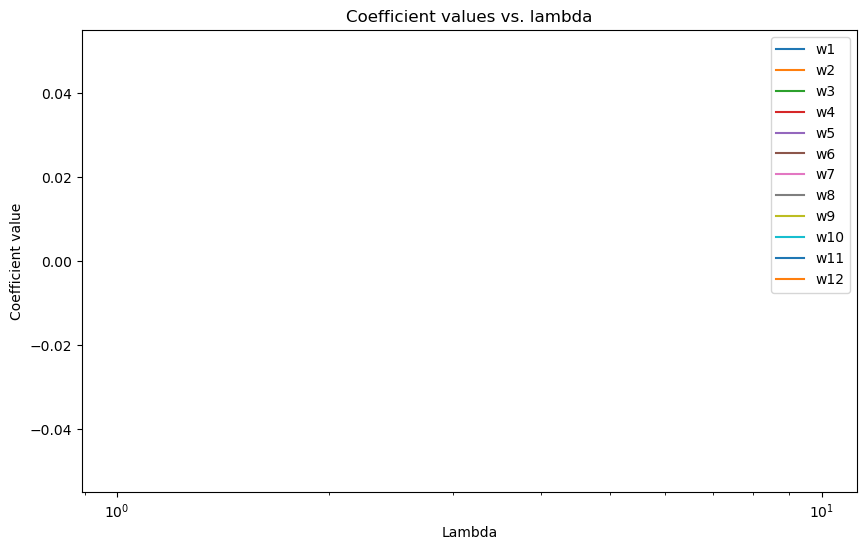

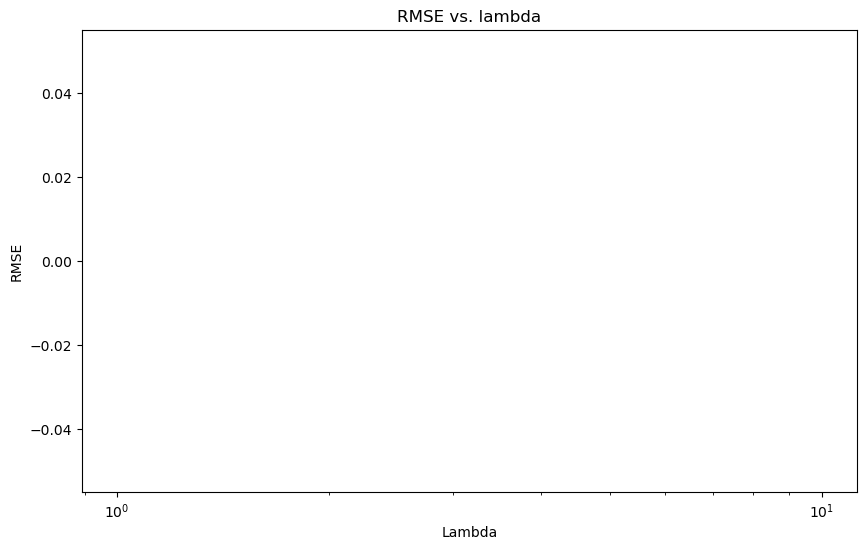

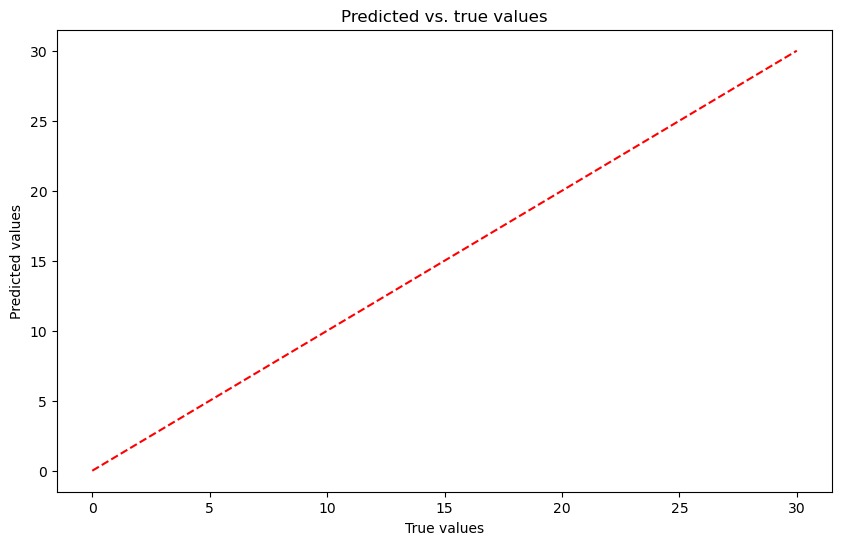

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_17320\1986320017.py:24: RuntimeWarning: overflow encountered in square
  bias = np.mean((mean_prediction - y_val)**2)
c:\Users\STUDENT\anaconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\STUDENT\anaconda3\Lib\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


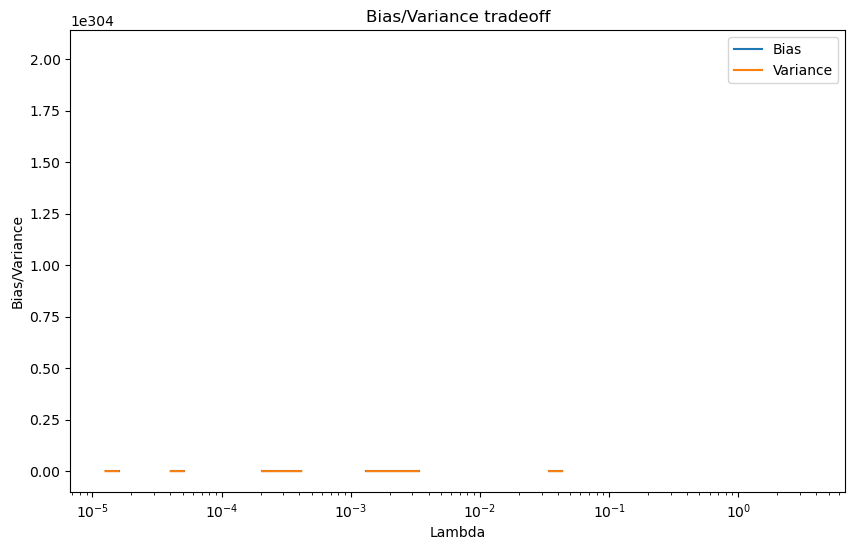

In [6]:
# Please complete this field.
if __name__ == '__main__':
    plot_coefficients_vs_lambda()
    plot_rmse_vs_lambda()
    plot_predicted_vs_true()
    plot_bias_variance_tradeoff()
    

### ================================
### Step 6: Plot Results
### ================================

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_17320\3704403763.py:20: RuntimeWarning: overflow encountered in matmul
  grad = -2 * X.T @ residuals + 2 * lam * w
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_17320\3704403763.py:19: RuntimeWarning: invalid value encountered in matmul
  residuals = y - X @ w
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_17320\3704403763.py:20: RuntimeWarning: overflow encountered in multiply
  grad = -2 * X.T @ residuals + 2 * lam * w
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_17320\3704403763.py:20: RuntimeWarning: overflow encountered in add
  grad = -2 * X.T @ residuals + 2 * lam * w
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_17320\3704403763.py:20: RuntimeWarning: invalid value encountered in matmul
  grad = -2 * X.T @ residuals + 2 * lam * w
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_17320\3704403763.py:28: RuntimeWarning: invalid value encountered in subtract
  w_new = w - lr * grad


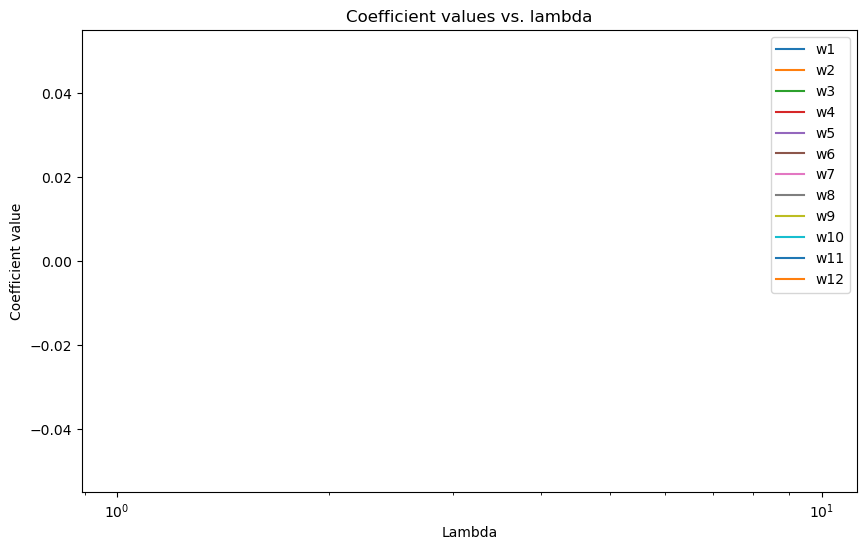

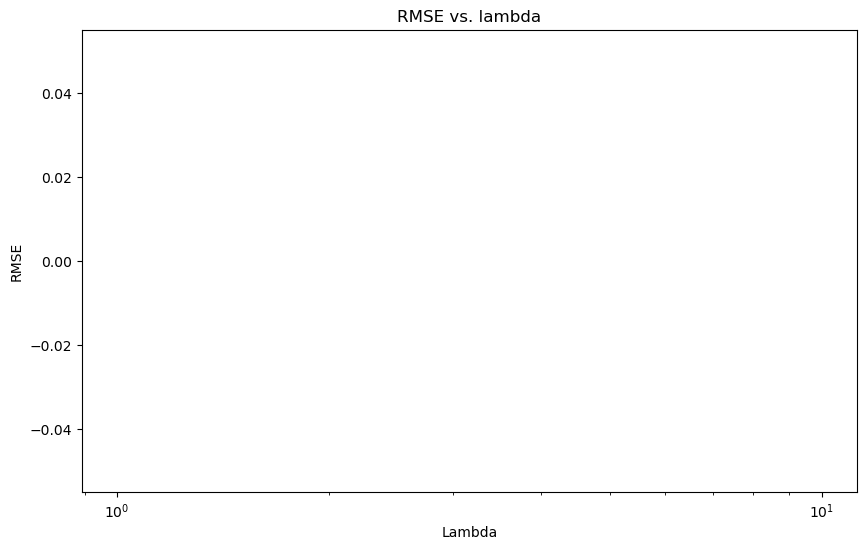

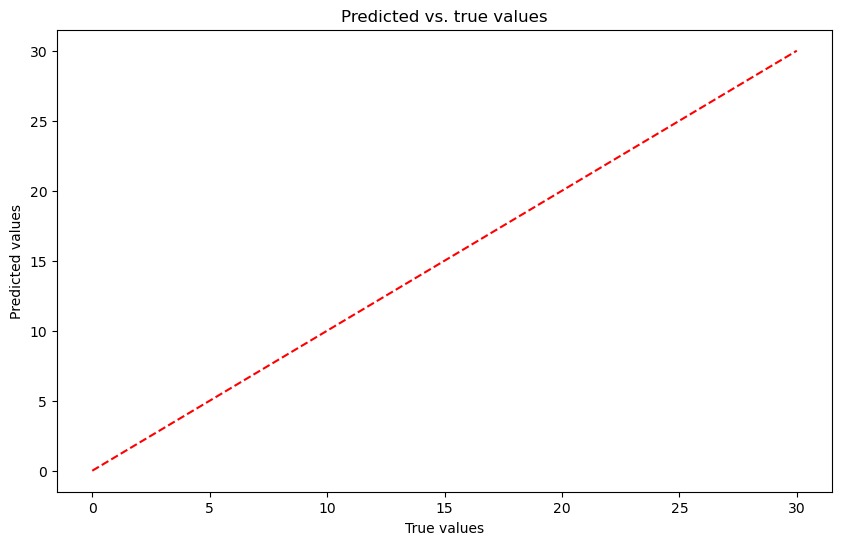

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_17320\1986320017.py:24: RuntimeWarning: overflow encountered in square
  bias = np.mean((mean_prediction - y_val)**2)


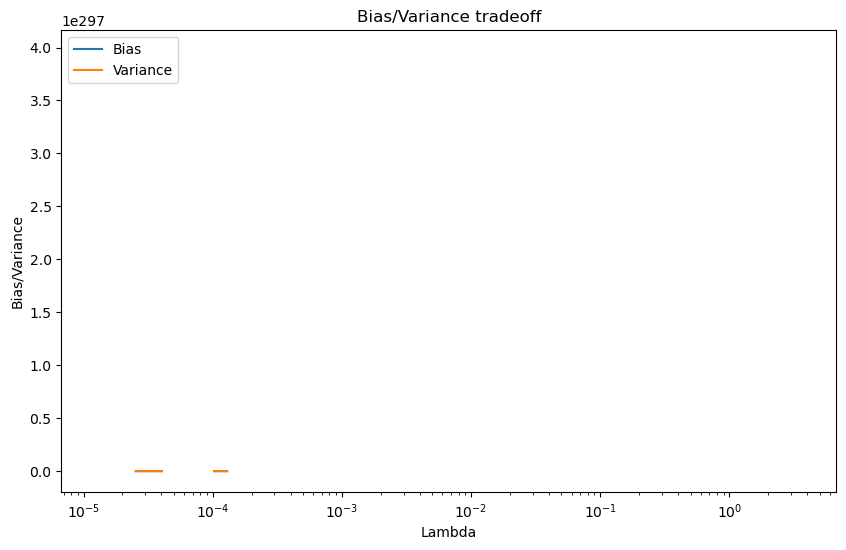

In [7]:
# Please complete this field.
if __name__ == '__main__':
    plot_coefficients_vs_lambda()
    plot_rmse_vs_lambda()
    plot_predicted_vs_true()
    plot_bias_variance_tradeoff()